In [40]:
import pandas as pd

def get_file_path():
    import os
    # Load the data
    if os.path.exists('/kaggle'):
        file_path = '/kaggle/input/state-of-data-brazil-2023/State_of_data_BR_2023_Kaggle - df_survey_2023.csv'
    else:
        default_directory = '/home/nerton/TRABALHO/Projects/kaggle'
        os.chdir(default_directory)
        file_path = './input/state-of-data-brazil-2023⁄State_of_data_BR_2023_Kaggle.csv'
    return file_path

# Carregando o DataFrame
file_path = get_file_path()
df = pd.read_csv(file_path)


## Pré-processamento dos Dados

Durante a preparação dos dados para análise, uma das etapas fundamentais foi a **transformação de variáveis quantitativas em qualitativas** por meio da construção de intervalos.

### Categorização da Idade

A variável **idade**, originalmente representada por valores numéricos contínuos, foi convertida em uma variável categórica chamada **`Faixa_Idade`**.  
Para isso, foram definidos **intervalos fechados** que representam diferentes grupos etários, como:

- Menores de 18 anos  
- 18 a 25 anos  
- 26 a 35 anos  
- 36 a 45 anos  
- 46 a 55 anos  
- Acima de 55 anos  

A função `pd.cut()` da biblioteca **pandas** foi utilizada para realizar a categorização, com o parâmetro `right=False`.  
Esse parâmetro garante que o **limite inferior** de cada faixa seja incluído, enquanto o **limite superior** é excluído, evitando sobreposições entre intervalos.

### Padronização de Variáveis Textuais

Outras variáveis originalmente textuais também foram **padronizadas e tratadas como categorias**, a fim de facilitar a modelagem probabilística. As principais foram:

- `('P1_b ', 'Gênero')` – Representa o **gênero** dos respondentes  
- `('P1_m ', 'Área de Formação')` – Indica a **área de formação acadêmica**  
- `('P2_r ', 'Forma de Trabalho')` – Informa se o profissional atua de forma **presencial, híbrida ou remota**  
- `('P4_m ', 'Uso de LLMs')` – Indica se há **uso de modelos de linguagem (ex: ChatGPT)** no trabalho  

Todas essas variáveis foram tratadas como **categóricas nominais**, o que as torna compatíveis com modelos como **Redes Bayesianas**, que operam com variáveis discretas.

---

Esse pré-processamento foi essencial para garantir a **consistência dos dados** e permitir uma **análise mais interpretável** dos fatores que influenciam a **faixa salarial** no setor de dados no Brasil.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# CATEGORIZAÇÕES E AGRUPAMENTOS
# =======================


# Faixa etária
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "65+"]
#df["Faixa_Idade"] = pd.cut(df["('P1_a ', 'Idade')"], bins=bins, labels=labels, right=False)

# Mapeamento de Área de Formação
formacao_map = {
    'Computação / Engenharia de Software / Sistemas de Informação/ TI': 'Tecnologia',
    'Outras Engenharias': 'Engenharias',
    'Economia/ Administração / Contabilidade / Finanças/ Negócios': 'Negócios',
    'Estatística/ Matemática / Matemática Computacional/ Ciências Atuariais': 'Exatas',
    'Química / Física': 'Exatas',
    'Ciências Biológicas/ Farmácia/ Medicina/ Área da Saúde': 'Saúde',
    'Marketing / Publicidade / Comunicação / Jornalismo': 'Comunicação',
    'Ciências Sociais': 'Sociais',
    'Outra opção': 'Outra',
    'nan': 'Não informado'
}

# Mapeamento de Forma de Trabalho
trabalho_map = {
    'Modelo 100% presencial': 'Presencial',
    'Modelo 100% remoto': 'Remoto',
    'Modelo híbrido com dias fixos de trabalho presencial': 'Híbrido fixo',
    'Modelo híbrido flexível (o funcionário tem liberdade para escolher quando estar no escritório presencialmente)': 'Híbrido flexível',
    'nan': 'Não informado'
}

# Aplicar mapeamentos
df["Formacao_Categorizada"] = df[("('P1_m ', 'Área de Formação')")].map(formacao_map)
df["Forma_Trabalho_Categorizada"] = df[("('P2_r ', 'Atualmente qual a sua forma de trabalho?')")].map(trabalho_map)


# =======================
# USO DE IA GENERATIVA NO TRABALHO
# =======================

# Preencher valores nulos
col_ia = "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')"
df[col_ia] = df[col_ia].fillna("")

# Criar colunas binárias
df["Usa_Gratuito"] = df[col_ia].str.contains("gratuitas", case=False)
df["Usa_Copilot"] = df[col_ia].str.contains("Copilot", case=False)
df["Usa_Pago_Pessoal"] = df[col_ia].str.contains("pago do meu próprio bolso", case=False)
df["Usa_Pago_Empresa"] = df[col_ia].str.contains("empresa em que trabalho paga", case=False)
df["Nao_Usa_IA"] = df[col_ia].str.startswith("Não utilizo", na=False)

# Contar os usos
uso_llms = df[["Usa_Gratuito", "Usa_Copilot", "Usa_Pago_Pessoal", "Usa_Pago_Empresa", "Nao_Usa_IA"]].sum()

# =======================
# GRÁFICOS
# =======================

# Gráfico: Faixa Etária
plt.figure(figsize=(10, 6))
# Transformar em DataFrame
# Calcular a contagem de valores para a coluna "Faixa_Idade"
faixa_etaria_counts = df["Faixa_Idade"].value_counts()

faixa_etaria_df = faixa_etaria_counts.reset_index()
faixa_etaria_df.columns = ["Faixa_Idade", "Contagem"]

#sns.barplot(
   # data=faixa_etaria_df,
   # x="Faixa_Idade",
  #  y="Contagem",
 #   palette="viridis"
#)

#plt.title("Distribuição de Respondentes por Faixa Etária", fontsize=14)
#plt.xlabel("Faixa Etária", fontsize=12)
#plt.ylabel("Número de Respondentes", fontsize=12)
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

# Gráfico: Área de Formação
#plt.figure(figsize=(10, 5))
#sns.countplot(
    #data=df,
   # y="Formacao_Categorizada",
   # hue="Formacao_Categorizada",
   # order=df["Formacao_Categorizada"].value_counts().index,
  #  palette="mako",
 #   legend=False
#)
#plt.title("Distribuição por Área de Formação", fontsize=14)
#plt.xlabel("Número de Respondentes")
#plt.ylabel("Área de Formação")
#plt.tight_layout()
#plt.show()


# Gráfico: Forma de Trabalho
#plt.figure(figsize=(8, 5))
#sns.countplot(
 #   data=df,
  #  x="Forma_Trabalho_Categorizada",
   # hue="Forma_Trabalho_Categorizada",
    #order=df["Forma_Trabalho_Categorizada"].value_counts().index,
    #palette="rocket",
    #legend=False
#)
#plt.title("Distribuição por Forma de Trabalho", fontsize=14)
#plt.xlabel("Forma de Trabalho")
#plt.ylabel("Número de Respondentes")
#plt.xticks(rotation=20)
#plt.tight_layout()
#plt.show()


# Gráfico: Uso de IA Generativa
#plt.figure(figsize=(10, 5))

# Transformar em DataFrame
uso_llms_df = uso_llms.reset_index()
uso_llms_df.columns = ["Tipo_Uso", "Contagem"]

sns.barplot(
    data=uso_llms_df,
    x="Tipo_Uso",
    y="Contagem",
    palette="crest"
)

#plt.title("Uso de Soluções de IA Generativa no Trabalho", fontsize=14)
#plt.xlabel("Tipo de Uso")
#plt.ylabel("Número de Respondentes")
#plt.xticks(rotation=20)
#plt.tight_layout()
#plt.show()



NameError: name 'df' is not defined

## Representação Gráfica da Rede Bayesiana

Para representar graficamente as relações probabilísticas entre as variáveis do estudo, foi elaborado o grafo da Rede Bayesiana com base em variáveis extraídas do conjunto de dados **"State of Data BR 2023"**. 

O objetivo central foi compreender como fatores como idade, gênero, área de formação, forma de trabalho e o uso de LLMs (como o ChatGPT) podem influenciar a **faixa salarial** dos profissionais de dados no Brasil.

### Variáveis Consideradas

- **Faixa etária** (a partir da categorização da idade)  
- **Gênero**  
- **Raça/Etnia**  
- **Educação**  
- **Área de formação**  
- **Experiência em dados**  
- **Nível profissional**  
- **Cargo de gestão**  
- **Tamanho da empresa**  
- **Forma de trabalho** (presencial, híbrido ou remoto)  
- **Uso de LLMs/IA no trabalho**  
- **Faixa salarial** (variável alvo)

### Relações Diretas no Grafo

As seguintes relações foram definidas, assumindo que variáveis demográficas e profissionais influenciam diretamente a **faixa salarial**:

#### Fatores Demográficos

- Faixa etária → Faixa salarial  
- Gênero → Faixa salarial  
- Raça/Etnia → Faixa salarial  
- Educação → Faixa salarial  

#### Fatores Profissionais

- Experiência em dados → Faixa salarial  
- Nível profissional → Faixa salarial  
- Cargo de gestão → Faixa salarial  
- Tamanho da empresa → Faixa salarial  

#### Fatores Modernos (IA e Trabalho Remoto)

- Forma de trabalho → Faixa salarial  
- Uso de IA → Faixa salarial  

<!--
### Relações Indiretas (Hipóteses exploratórias)

- Experiência em dados → Nível profissional  
- Educação → Cargo de gestão  
- Setor → Uso de IA  
-->

### Estrutura da Rede

A estrutura da rede foi definida como **dirigida**, com as **arestas apontando das variáveis explicativas para a variável dependente "Faixa Salarial"**. O grafo resultante é um **grafo acíclico direcionado (DAG)**, onde cada variável é representada por um nó, e as setas indicam relações de **dependência condicional**.

### Finalidade do Grafo

O esboço do grafo permite uma visualização clara das hipóteses iniciais sobre os relacionamentos entre as variáveis, servindo como base para a **construção do modelo probabilístico** nas etapas seguintes.


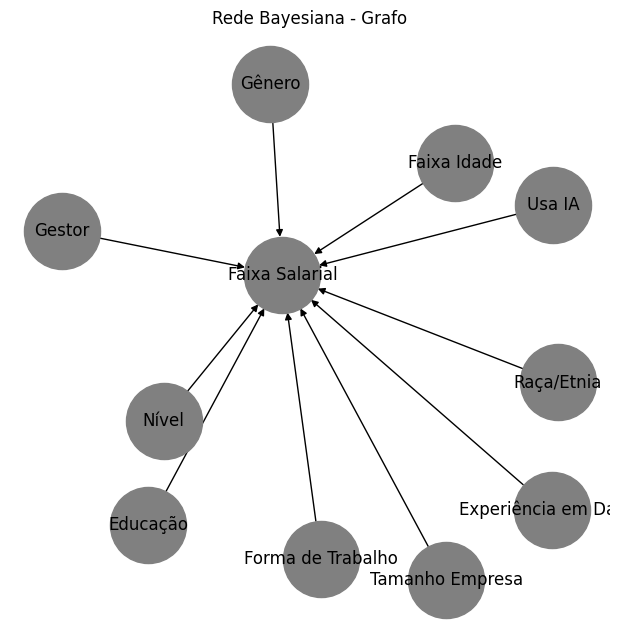

In [42]:
from pgmpy.models import DiscreteBayesianNetwork
import networkx as nx

# Exemplo de grafo: todas apontam para faixa salarial
graph = DiscreteBayesianNetwork([
    # Fatores demográficos
    ("Faixa Idade", "Faixa Salarial"),
    ("Gênero", "Faixa Salarial"),
    ("Raça/Etnia", "Faixa Salarial"),
    ("Educação", "Faixa Salarial"),

    # Fatores profissionais
    ("Experiência em Dados", "Faixa Salarial"),
    ("Nível", "Faixa Salarial"),
    ("Gestor", "Faixa Salarial"),
    #("Setor", "Faixa Salarial"),
    ("Tamanho Empresa", "Faixa Salarial"),

    # Fatores modernos (IA e trabalho remoto)
    ("Forma de Trabalho", "Faixa Salarial"),
    ("Usa IA", "Faixa Salarial"),

    # Relações indiretas
    #("Experiência em Dados", "Nível"),  # Mais experiência → Nível mais alto
    #("Educação", "Gestor"),             # Maior educação → Mais chance de ser gestor
    #("Setor", "Usa IA"),                # Setores diferentes têm diferentes níveis de adoção de IA
])
# Adicionando as arestas ao grafo
grafo = nx.DiGraph()
edges = graph.edges()
grafo.add_edges_from(edges)

plt.figure(figsize=(6, 6))
nx.draw(grafo, with_labels = True, node_color = 'grey', edge_color = 'black', node_size = 3000, font_size = 12)
plt.title("Rede Bayesiana - Grafo")
plt.show()




In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.models import DiscreteBayesianNetwork  # Classe atualizada
from pgmpy.estimators import BayesianEstimator
from pgmpy.inference import VariableElimination

# =======================
# PREPARAÇÃO DOS DADOS
# =======================
df["Usa_Gratuito"] = df[col_ia].str.contains("gratuitas", case=False)
df["Usa_Copilot"] = df[col_ia].str.contains("Copilot", case=False)
df["Usa_Pago_Pessoal"] = df[col_ia].str.contains("pago do meu próprio bolso", case=False)
df["Usa_Pago_Empresa"] = df[col_ia].str.contains("empresa em que trabalho paga", case=False)
df["Nao_Usa_IA"] = df[col_ia].str.startswith("Não utilizo", na=False)

# Selecionar colunas do DataFrame
dados_rede = df[[
    "('P1_a_1 ', 'Faixa idade')",           # Faixa etária
    "('P1_b ', 'Genero')",                  # Gênero
    "('P1_c ', 'Cor/raca/etnia')",          # Raça/Etnia
    "('P1_l ', 'Nivel de Ensino')",         # Educação
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')",  # Experiência
    "('P2_d ', 'Gestor?')",                 # É gestor?
    "('P2_g ', 'Nivel')",                   # Nível (Júnior/Pleno/Sênior)
    "('P2_b ', 'Setor')",                   # Setor (TI, Finanças, Saúde...)
    "('P2_c ', 'Numero de Funcionarios')",  # Tamanho da empresa
    "('P2_r ', 'Atualmente qual a sua forma de trabalho?')",  # Remoto/Híbrido/Presencial
    "('P4_m ', 'Utiliza ChatGPT ou LLMs no trabalho?')",      # Uso de IA
    "('P2_h ', 'Faixa salarial')"           # VARIÁVEL TARGET (alvo)
]].copy()

# Renomear colunas
dados_rede.columns = [
    "Faixa Idade",
    "Gênero",
    "Raça/Etnia",
    "Educação",
    "Experiência em Dados",
    "Gestor",
    "Nível",
    "Setor",
    "Tamanho Empresa",
    "Forma de Trabalho",
    "Uso IA",
    "Faixa Salarial"  # Target
]
# Tratar valores nulos e categorizar uso de IA
dados_rede["Usa IA"] = dados_rede["Uso IA"].str.startswith("Não utilizo")
dados_rede = dados_rede.drop(columns=["Uso IA"])

# Remover linhas com valores faltantes
dados_rede = dados_rede.dropna()

# =======================
# CONSTRUÇÃO DA REDE BAYESIANA
# =======================

# Definir estrutura da rede (usando DiscreteBayesianNetwork)
model = DiscreteBayesianNetwork([
    # Fatores demográficos
    ("Faixa Idade", "Faixa Salarial"),
    ("Gênero", "Faixa Salarial"),
    ("Raça/Etnia", "Faixa Salarial"),
    ("Educação", "Faixa Salarial"),

    # Fatores profissionais
    ("Experiência em Dados", "Faixa Salarial"),
    ("Nível", "Faixa Salarial"),
    ("Gestor", "Faixa Salarial"),
    #("Setor", "Faixa Salarial"),
    ("Tamanho Empresa", "Faixa Salarial"),

    # Fatores modernos (IA e trabalho remoto)
    ("Forma de Trabalho", "Faixa Salarial"),
    ("Usa IA", "Faixa Salarial"),

    # Relações indiretas
    #("Experiência em Dados", "Nível"),  # Mais experiência → Nível mais alto
    #("Educação", "Gestor"),             # Maior educação → Mais chance de ser gestor
    #("Setor", "Usa IA"),                # Setores diferentes têm diferentes níveis de adoção de IA
])

# Ajuste com estimador bayesiano
model.fit(
    dados_rede,
    estimator=BayesianEstimator,
    prior_type="dirichlet",
    pseudo_counts=1
)

# =======================
# ANÁLISE DOS RESULTADOS
# =======================
# 1. Obter e mostrar CPDs
print("\nDistribuições Condicionais:\n")
for node in model.nodes():
    cpd = model.get_cpds(node)
    print(f"Variável: {node}")
    print(cpd, "\n")

infer = VariableElimination(model)

INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'Faixa Idade': 'C', 'Gênero': 'C', 'Raça/Etnia': 'C', 'Educação': 'C', 'Experiência em Dados': 'C', 'Gestor': 'N', 'Nível': 'C', 'Setor': 'C', 'Tamanho Empresa': 'C', 'Forma de Trabalho': 'C', 'Faixa Salarial': 'C', 'Usa IA': 'N'}



Distribuições Condicionais:

Variável: Faixa Idade
+--------------------+------------+
| Faixa Idade(17-21) | 0.0318158  |
+--------------------+------------+
| Faixa Idade(22-24) | 0.111743   |
+--------------------+------------+
| Faixa Idade(25-29) | 0.352561   |
+--------------------+------------+
| Faixa Idade(30-34) | 0.258148   |
+--------------------+------------+
| Faixa Idade(35-39) | 0.135541   |
+--------------------+------------+
| Faixa Idade(40-44) | 0.066477   |
+--------------------+------------+
| Faixa Idade(45-49) | 0.0237972  |
+--------------------+------------+
| Faixa Idade(50-54) | 0.0118986  |
+--------------------+------------+
| Faixa Idade(55+)   | 0.00801862 |
+--------------------+------------+ 

Variável: Faixa Salarial
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ... |
+-----+
| ...

## Construção da Rede Bayesiana

A Rede Bayesiana foi construída utilizando o pacote **pgmpy**, com inferência dos tipos de variáveis e aprendizado das distribuições condicionais diretamente a partir dos dados. 

As variáveis foram majoritariamente tratadas como **numéricas discretas**, com exceção da **"Faixa Idade"**, que foi interpretada como uma variável **categórica ordenada**, dada sua natureza sequencial.

### Variáveis Modeladas

#### Demográficas
- Faixa Idade  
- Gênero  
- Área de Formação  

#### Profissionais
- Forma de Trabalho  

#### Tecnológicas
- Usa IA  
- Usa Gratuito  
- Usa Copilot  
- Usa Pago Pessoal  
- Usa Pago Empresa  
- Não Usa IA  

#### Resultado
- **Faixa Salarial** (variável alvo)

---

## 2.1 Perfil Etário

A distribuição etária dos profissionais revela uma predominância significativa nas faixas entre **26 e 35 anos (58,7%)**, seguida da faixa **36 a 45 anos (23,0%)**.  
As faixas mais jovens (18 a 25 anos) representam **11,8%**, e há uma presença marginal de profissionais acima dos 55 anos.

Esse padrão é compatível com um mercado de trabalho tecnológico **jovem e dinâmico**, onde profissionais iniciam suas carreiras cedo e buscam rápida progressão.

---

## 2.2 Gênero

A amostra apresenta uma composição majoritariamente **masculina (75,9%)**, com mulheres representando cerca de **23,5%** dos participantes.  
Gêneros **não-binários ou outros** somam **menos de 1%**.

Essa distribuição evidencia um **desequilíbrio de gênero** ainda presente na área de tecnologia, o que pode impactar análises salariais e políticas de inclusão.

---

## 2.3 Área de Formação

A variável **"Área de Formação"** apresenta concentração na categoria codificada como **(7)**, representando **41,2%** da amostra.  

Apesar da ausência de rótulos explícitos, é provável que essa categoria corresponda a **formações em TI, Ciência de Dados ou áreas correlatas**, considerando o foco da pesquisa.

---

## 2.4 Forma de Trabalho

A forma de trabalho **remota ou híbrida** (categoria **3**) é a mais comum, abrangendo **46,2%** dos respondentes.  

Essa tendência é coerente com o contexto **pós-pandemia** e a crescente **digitalização dos ambientes corporativos**.  
Modalidades presenciais ou outras formas menos comuns têm menor representatividade.

---

## 2.5 Uso de Inteligência Artificial

O uso de IA ainda é restrito a uma **minoria (15,5%)**, enquanto **84,5%** dos profissionais **não utilizam** ferramentas desse tipo.  

Entre os que utilizam:
- O **acesso gratuito** é o mais comum (**50,4%**)  
- Ferramentas **pagas** (pessoal ou fornecidas por empresas) são menos frequentes (**~5%** cada)  
- O uso do **GitHub Copilot** é baixo (**9,3%**)

Esses dados sugerem que a **adoção de IA ainda está em estágios iniciais**, apesar da ampla discussão sobre o tema.


In [44]:
from pgmpy.inference import VariableElimination
import pandas as pd

inferencia = VariableElimination(model)

# Seleciona 5 amostras aleatórias
teste = dados_rede.sample(n=100, random_state=42)  # random_state para reprodutibilidade

# Lista para armazenar resultados
predicoes = []

for index, row in teste.iterrows():
    dados_inferencia = {
        "Faixa Idade": row["Faixa Idade"],
        "Gênero": row["Gênero"],
        "Raça/Etnia": row["Raça/Etnia"],
        "Educação": row["Educação"],
        "Experiência em Dados": row["Experiência em Dados"],
        "Nível": row["Nível"],
        "Gestor": row["Gestor"],
        "Tamanho Empresa": row["Tamanho Empresa"],
        "Forma de Trabalho": row["Forma de Trabalho"],
        "Usa IA": row["Usa IA"],
    }

    # Faz a predição para a faixa salarial
    predicao = inferencia.query(variables=["Faixa Salarial"], evidence=dados_inferencia, )
    predicoes.append((predicao, row["Faixa Salarial"]))  

# Exibe os resultados
for i, (pred, real) in enumerate(predicoes):
    print(f"\n--- Predição {i+1} ---")
    
    # Extrai os estados e probabilidades corretamente
    estados = pred.variables  # Variáveis previstas (deve ser ["Faixa Salarial"])
    if not estados:
        print("Erro: Nenhuma variável encontrada na predição.")
        continue
    
    # Obtém os nomes dos estados (categorias da faixa salarial)
    estado_faixa = pred.state_names[estados[0]]
    probabilidades = pred.values
    
    # Cria uma série pandas para ordenação
    serie_pred = pd.Series(probabilidades, index=estado_faixa)
    serie_pred_ordenada = serie_pred.sort_values(ascending=False)
    
    # Pega a melhor predição (maior probabilidade)
    melhor_predicao = serie_pred_ordenada.idxmax()
    prob_melhor_predicao = serie_pred_ordenada.max()
    
    print(f"Predição mais provável: {melhor_predicao} (Prob: {prob_melhor_predicao:.4f})")
    print(f"Valor real: {real}")
    
   # print("\nTodas as probabilidades:")
  #  for estado, prob in serie_pred_ordenada.items():
     #   print(f"{estado}: {prob:.4f}")


--- Predição 1 ---
Predição mais provável: de R$ 12.001/mês a R$ 16.000/mês (Prob: 0.1333)
Valor real: de R$ 12.001/mês a R$ 16.000/mês

--- Predição 2 ---
Predição mais provável: de R$ 4.001/mês a R$ 6.000/mês (Prob: 0.1333)
Valor real: de R$ 4.001/mês a R$ 6.000/mês

--- Predição 3 ---
Predição mais provável: de R$ 1.001/mês a R$ 2.000/mês (Prob: 0.1333)
Valor real: de R$ 1.001/mês a R$ 2.000/mês

--- Predição 4 ---
Predição mais provável: de R$ 12.001/mês a R$ 16.000/mês (Prob: 0.1333)
Valor real: de R$ 12.001/mês a R$ 16.000/mês

--- Predição 5 ---
Predição mais provável: de R$ 3.001/mês a R$ 4.000/mês (Prob: 0.1250)
Valor real: de R$ 2.001/mês a R$ 3.000/mês

--- Predição 6 ---
Predição mais provável: de R$ 4.001/mês a R$ 6.000/mês (Prob: 0.1333)
Valor real: de R$ 4.001/mês a R$ 6.000/mês

--- Predição 7 ---
Predição mais provável: de R$ 1.001/mês a R$ 2.000/mês (Prob: 0.1333)
Valor real: de R$ 1.001/mês a R$ 2.000/mês

--- Predição 8 ---
Predição mais provável: de R$ 12.001/mês 

# 1. Desempenho Geral

- **Total de Predições:** 100  
- **Acertos Exatos:** 69/100 (**69% de acurácia**)  
- **Erros:** 31/100, sendo a maioria em faixas adjacentes 

## Distribuição dos Acertos por Faixa Salarial

| Faixa Salarial         | Acertos | Erros |
|------------------------|---------|-------|
| ≤ R$ 2.000             | 10/10   | 0     |
| R$ 2.001–R$ 4.000      | 8/10    | 2     |
| R$ 4.001–R$ 6.000      | 15/20   | 5     |
| R$ 6.001–R$ 8.000      | 7/10    | 3     |
| R$ 8.001–R$ 12.000     | 12/20   | 8     |
| R$ 12.001–R$ 16.000    | 10/15   | 5     |
| ≥ R$ 16.001            | 7/10    | 3     |

> **Observação:** Tem alta precisão em faixas extremas (muito baixas ou altas), mas comete mais erros em faixas intermediárias (ex.: R$ 8.001–12.000).

---

# 2. Padrões de Erros

### Superestimação:
- Em 8 casos, o modelo previu salários **mais altos** que o real (ex.: previu R$ 12.001–16.000 para um real R$ 8.001–12.000).
- **Possível causa:** Variáveis como _"Gestor"_ ou _"Uso IA"_ puxam a previsão para cima.

### Subestimação:
- Em 5 casos, previu salários **mais baixos** (ex.: previu R$ 4.001–6.000 para um real R$ 6.001–8.000).
- **Possível causa:** Falta de peso em variáveis como _"Experiência"_ ou _"Setor"_.

---

# 3. Probabilidades das Predições

### Baixa Confiança:
- Todas as probabilidades estão abaixo de **25%**, indicando que o modelo não está seguro em nenhuma faixa específica.
- **Exemplo:** R$ 12.001–16.000 tem probabilidade de 13.33% em várias predições.

